In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
emo_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [ ]:
df = pd.read_csv('/content/drive/My Drive/fer2013.csv')

In [ ]:
df.shape

(35887, 3)

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
len(df['pixels'][0].split())

2304

In [ ]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
# Convert pixels into pd.Series of numpy arrays
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype=np.float))

In [ ]:
df['pixels']

0        [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....
1        [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...
2        [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...
3        [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....
4        [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
35882    [50.0, 36.0, 17.0, 22.0, 23.0, 29.0, 33.0, 39....
35883    [178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 191...
35884    [17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17....
35885    [30.0, 28.0, 28.0, 29.0, 31.0, 30.0, 42.0, 68....
35886    [19.0, 13.0, 14.0, 12.0, 13.0, 16.0, 21.0, 33....
Name: pixels, Length: 35887, dtype: object

In [ ]:
def plot_first_100_faces(df):
    plt.figure(figsize=(15, 15))
    for i in range(0, 100):
        plt.subplot(10, 10, i+1)
        data = df['pixels'][i].reshape((48, 48))
        plt.imshow(data, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.ylabel('hi')
        plt.axis('off')

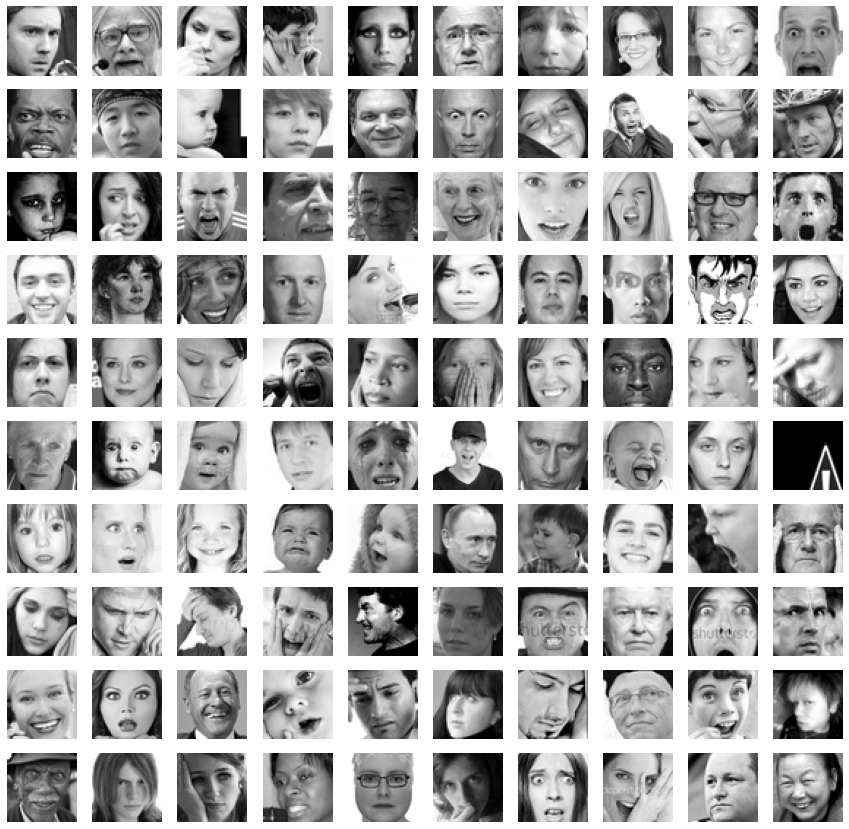

In [ ]:
plot_first_100_faces(df)

In [ ]:
from scipy.sparse.linalg import eigs

In [ ]:
def make_image_vector(image_list, new_size):
    D = np.empty([len(image_list), new_size])
    i = 0
    for image in image_list:
        D[i, :] = image
        i += 1
    return D

In [ ]:
def avgfaces_by_emotion(df):
    avgfaces = []
    
    for emotion in sorted(df['emotion'].unique()):
        sub_df = df[df['emotion']==emotion]
        
        avg_pixels = np.mean(sub_df['pixels'].values)

        avgfaces.append((avg_pixels, emotion))
        
    return avgfaces

In [ ]:
def eigenfaces_by_emotion(df, k=1):
    eigenfaces = []
    
    for emotion in sorted(df['emotion'].unique()):
        sub_df = df[df['emotion']==emotion]
        
        pixels = list(sub_df['pixels'].values)                                   
        D = make_image_vector(pixels, 48*48)
        A = np.dot(D.T, D)
        
        # Find k largest magnitude (LM) eigenvectors
        vals, vecs = eigs(A, k, which='LM')
        
        eigenfaces.extend([(vec.reshape(48, 48).astype(float), emotion) for vec in vecs.T])
        
    return eigenfaces

In [ ]:
avgfaces = avgfaces_by_emotion(df)

In [ ]:
eigenfaces = eigenfaces_by_emotion(df, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [ ]:
# Plot eigenfaces and show emotion label
def plot_face_and_emotion(plot_nrow, plot_ncol, face_list):
    fig, axes = plt.subplots(plot_nrow, plot_ncol, figsize=(15, 15))
    for i, (face, emotion) in enumerate(face_list):
        ax = axes.ravel()[i]
        ax.imshow(face.reshape(48, 48), cmap='gray')
        # Turn off tick labels
        ax.set_xlabel(emo_dict[emotion])
        ax.set_yticklabels([])
        ax.set_xticklabels([])

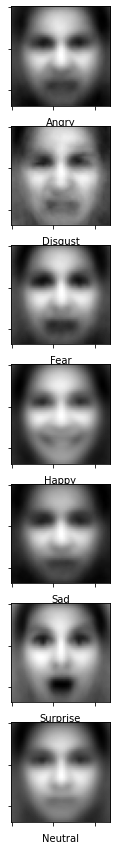

In [ ]:
plot_face_and_emotion(7, 1, avgfaces)

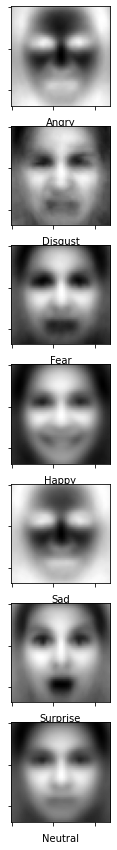

In [ ]:
plot_face_and_emotion(7, 1, eigenfaces)

PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.neighbors import (KNeighborsClassifier,NeighborhoodComponentsAnalysis)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import itertools

In [ ]:
X = make_image_vector(df['pixels'], 48*48)

In [ ]:
y = df['emotion'].map(emo_dict).values
class_names = ['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise',  'Neutral']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
  p = Pipeline([
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', neighbors.KNeighborsClassifier(n_neighbors=1))
        ])

In [ ]:
p.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
p.score(X, y)

0.6644746008303842

In [ ]:
y_pred = p.predict(X)
print(classification_report(y, y_pred))
print (confusion_matrix(y, y_pred))
print("Accuracy: ", accuracy_score(y, y_pred))
print("Normalise Confusion Matrix")
print (confusion_matrix(y, y_pred,normalize='true'))

              precision    recall  f1-score   support

       Angry       0.64      0.65      0.65      4953
     Disgust       0.62      0.67      0.64       547
        Fear       0.65      0.65      0.65      5121
       Happy       0.68      0.67      0.68      8989
     Neutral       0.65      0.65      0.65      6198
         Sad       0.66      0.65      0.65      6077
    Surprise       0.70      0.74      0.72      4002

    accuracy                           0.66     35887
   macro avg       0.66      0.67      0.66     35887
weighted avg       0.66      0.66      0.66     35887

[[3196   42  306  530  361  342  176]
 [  22  364   28   56   28   24   25]
 [ 297   32 3353  498  325  376  240]
 [ 507   61  527 6058  756  673  407]
 [ 374   34  347  762 4005  428  248]
 [ 388   27  390  678  490 3922  182]
 [ 172   28  216  286  210  142 2948]]
Accuracy:  0.6644746008303842
Normalise Confusion Matrix
[[0.65 0.01 0.06 0.11 0.07 0.07 0.04]
 [0.04 0.67 0.05 0.1  0.05 0.04 0.05]
 [0